In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
import numpy as np
import time

#### Are there any GPUs?

In [34]:
tf.__version__

'2.5.0-rc0'

In [35]:
keras.__version__

'2.5.0'

In [36]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

['/device:CPU:0', '/device:GPU:0']


#### Check CPU vs GPU performance

In [81]:
def count_seconds(matrix, num_runs=5, device='gpu'):
    runtimes = []    
    for i in range(num_runs):
        start = time.perf_counter()
        with tf.device(f'/{device}:0'):
            a = tf.constant(matrix, shape=[*matrix.shape], dtype=tf.float32, name='a')
            b = tf.constant(matrix, shape=[*matrix.shape], dtype=tf.float32, name='b')
            c = tf.matmul(a, b)
        elapsed = time.perf_counter() - start
        runtimes.append(elapsed)
    print(f'Elapsed {np.mean(runtimes):.3f} +/- {np.std(runtimes)/np.sqrt(num_runs):.3f} seconds on {device}.')
    return np.mean(runtimes)

In [82]:
cpu_runtimes = []
gpu_runtimes = []

Ns = [10, 50, 100, 250, 500, 1000, 2500, 5000, 7500, 10000]

for N in Ns:
    matrix = np.random.randn(N, N).astype(np.float32)
    cpu_runtimes.append(count_seconds(matrix, num_runs=3, device='cpu'))
    gpu_runtimes.append(count_seconds(matrix, num_runs=3, device='gpu'))

Elapsed 0.000 +/- 0.000 seconds on cpu.
Elapsed 0.005 +/- 0.004 seconds on gpu.
Elapsed 0.000 +/- 0.000 seconds on cpu.
Elapsed 0.001 +/- 0.001 seconds on gpu.
Elapsed 0.000 +/- 0.000 seconds on cpu.
Elapsed 0.000 +/- 0.000 seconds on gpu.
Elapsed 0.000 +/- 0.000 seconds on cpu.
Elapsed 0.001 +/- 0.000 seconds on gpu.
Elapsed 0.001 +/- 0.000 seconds on cpu.
Elapsed 0.001 +/- 0.000 seconds on gpu.
Elapsed 0.005 +/- 0.000 seconds on cpu.
Elapsed 0.003 +/- 0.000 seconds on gpu.
Elapsed 0.075 +/- 0.000 seconds on cpu.
Elapsed 0.016 +/- 0.002 seconds on gpu.
Elapsed 0.552 +/- 0.002 seconds on cpu.
Elapsed 0.096 +/- 0.008 seconds on gpu.
Elapsed 1.844 +/- 0.013 seconds on cpu.
Elapsed 0.252 +/- 0.007 seconds on gpu.
Elapsed 4.329 +/- 0.032 seconds on cpu.
Elapsed 0.518 +/- 0.039 seconds on gpu.


In [83]:
import matplotlib.pyplot as plt

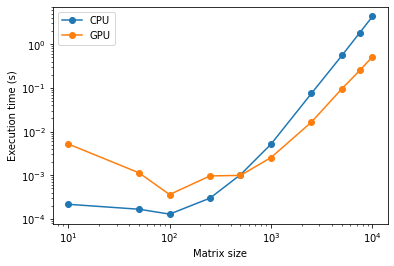

In [84]:
plt.loglog(Ns, cpu_runtimes, '-o', label='CPU')
plt.loglog(Ns, gpu_runtimes, '-o', label='GPU')

plt.legend()
plt.ylabel('Execution time (s)')
plt.xlabel('Matrix size')

plt.show()